# Random Forest Implementation


## 1. Install Dependencies

In [1]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 13.5 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=af194e627264cb86fcaad0c013d420e6f7172d792a088a4b7341df409a785086
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


## 2. Import Dependencies

In [17]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import mlcroissant as mlc
import itertools
from sklearn.calibration import calibration_curve
import joblib

## 3. Download Dataset

In [3]:
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/katehighnam/beth-dataset/croissant/download')

  -  [Metadata(BETH Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


## 4. Display and Retrieve Metadata

In [4]:
record_sets = croissant_dataset.metadata.record_sets
for record in record_sets:
    print(record)

RecordSet(uuid="labelled_2021may-ip-10-100-1-105-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-105.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-186-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-186.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-26-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-26.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-4-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-4.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-95-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-95.csv")
RecordSet(uuid="labelled_2021may-ubuntu-dns.csv")
RecordSet(uuid="labelled_2021may-ubuntu.csv")
RecordSet(uuid="labelled_testing_data.csv")
RecordSet(uuid="labelled_training_data.csv")
RecordSet(uuid="labelled_validation_data.csv")


Extract the first record set and convert to a DataFrame

In [5]:
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

,labelled_2021may-ip-10-100-1-105-dns.csv/Timestamp,labelled_2021may-ip-10-100-1-105-dns.csv/SourceIP,labelled_2021may-ip-10-100-1-105-dns.csv/DestinationIP,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQuery,labelled_2021may-ip-10-100-1-105-dns.csv/DnsAnswer,labelled_2021may-ip-10-100-1-105-dns.csv/DnsAnswerTTL,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryNames,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryClass,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryType,labelled_2021may-ip-10-100-1-105-dns.csv/NumberOfAnswers,labelled_2021may-ip-10-100-1-105-dns.csv/DnsResponseCode,labelled_2021may-ip-10-100-1-105-dns.csv/DnsOpCode,labelled_2021may-ip-10-100-1-105-dns.csv/SensorId,labelled_2021may-ip-10-100-1-105-dns.csv/sus,labelled_2021may-ip-10-100-1-105-dns.csv/evil
0,2021-05-16 17:13:14+00:00,b'10.100.1.95',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",0,0,0,b'ip-10-100-1-95',0,0
1,2021-05-16 17:13:14+00:00,b'10.100.0.2',b'10.100.1.95',b'ssm.us-east-2.amazonaws.com',"b""['52.95.19.240']""","b""['17']""",b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",1,0,0,b'ip-10-100-1-95',0,0
2,2021-05-16 17:13:14+00:00,b'10.100.1.95',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['AAAA']""",0,0,0,b'ip-10-100-1-95',0,0
3,2021-05-16 17:13:14+00:00,b'10.100.0.2',b'10.100.1.95',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['AAAA']""",0,0,0,b'ip-10-100-1-95',0,0
4,2021-05-16 17:13:16+00:00,b'10.100.1.186',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",0,0,0,b'ip-10-100-1-186',0,0


In [6]:
!curl -L -o ~/beth-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/katehighnam/beth-dataset

!unzip /root/beth-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 39.7M  100 39.7M    0     0  72.0M      0 --:--:-- --:--:-- --:--:-- 72.0M
Archive:  /root/beth-dataset.zip
  inflating: labelled_2021may-ip-10-100-1-105-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-105.csv  
  inflating: labelled_2021may-ip-10-100-1-186-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-186.csv  
  inflating: labelled_2021may-ip-10-100-1-26-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-26.csv  
  inflating: labelled_2021may-ip-10-100-1-4-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-4.csv  
  inflating: labelled_2021may-ip-10-100-1-95-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-95.csv  
  inflating: labelled_2021may-ubuntu-dns.csv  
  inflating: labelled_2021may-ubuntu.csv  
  inflating: labelled_testing

## 5. Merge Datasets

In [7]:
csv_files = [
    'labelled_2021may-ip-10-100-1-105-dns.csv',
    'labelled_2021may-ip-10-100-1-105.csv',
    'labelled_2021may-ip-10-100-1-186-dns.csv',
    'labelled_2021may-ip-10-100-1-186.csv',
    'labelled_2021may-ip-10-100-1-26-dns.csv',
    'labelled_2021may-ip-10-100-1-26.csv',
    'labelled_2021may-ip-10-100-1-4-dns.csv',
    'labelled_2021may-ip-10-100-1-4.csv',
    'labelled_2021may-ip-10-100-1-95-dns.csv',
    'labelled_2021may-ip-10-100-1-95.csv',
    'labelled_2021may-ubuntu-dns.csv',
    'labelled_2021may-ubuntu.csv',
    'labelled_testing_data.csv',
    'labelled_training_data.csv',
    'labelled_validation_data.csv'
]

combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

combined_data.to_csv('combined_dataset.csv', index=False)

print(f"Combined dataset shape: {combined_data.shape}")
print(combined_data.head())


Combined dataset shape: (3808810, 29)
              Timestamp      SourceIP DestinationIP  \
0  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
1  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
2  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
3  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
4  2021-05-16T17:13:16Z  10.100.1.186    10.100.0.2   

                      DnsQuery         DnsAnswer DnsAnswerTTL  \
0  ssm.us-east-2.amazonaws.com               NaN          NaN   
1  ssm.us-east-2.amazonaws.com  ['52.95.19.240']       ['17']   
2  ssm.us-east-2.amazonaws.com               NaN          NaN   
3  ssm.us-east-2.amazonaws.com               NaN          NaN   
4  ssm.us-east-2.amazonaws.com               NaN          NaN   

                 DnsQueryNames DnsQueryClass DnsQueryType  NumberOfAnswers  \
0  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              0.0   
1  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              1.0   
2  ssm

## 6. Dataset Summary, Info, Description

In [8]:
df = pd.read_csv("combined_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


<ipython-input-8-d891aa00041c>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,12,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_dataset.csv")


              Timestamp      SourceIP DestinationIP  \
0  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
1  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
2  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
3  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
4  2021-05-16T17:13:16Z  10.100.1.186    10.100.0.2   

                      DnsQuery         DnsAnswer DnsAnswerTTL  \
0  ssm.us-east-2.amazonaws.com               NaN          NaN   
1  ssm.us-east-2.amazonaws.com  ['52.95.19.240']       ['17']   
2  ssm.us-east-2.amazonaws.com               NaN          NaN   
3  ssm.us-east-2.amazonaws.com               NaN          NaN   
4  ssm.us-east-2.amazonaws.com               NaN          NaN   

                 DnsQueryNames DnsQueryClass DnsQueryType  NumberOfAnswers  \
0  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              0.0   
1  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              1.0   
2  ssm.us-east-2.amazonaws.com        ['IN']

## 7. Handle Missing Values

In [9]:
df2 = pd.read_csv("combined_dataset.csv")

missing_values = df2.isnull().sum()
print("missing values")
print(missing_values[missing_values > 0])

threshold = 0.6 * len(df2)
df2 = df2.dropna(thresh=threshold, axis=1)

df2.fillna(df2.median(numeric_only=True), inplace=True)

df2.fillna("Unknown", inplace=True)

print("verify")
print(df2.isnull().sum())

<ipython-input-9-8f36dce0b5b9>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,12,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("combined_dataset.csv")


missing values
Timestamp          3807196
SourceIP           3807196
DestinationIP      3807196
DnsQuery           3807196
DnsAnswer          3808420
DnsAnswerTTL       3808420
DnsQueryNames      3807196
DnsQueryClass      3807196
DnsQueryType       3807196
NumberOfAnswers    3807196
DnsResponseCode    3807196
DnsOpCode          3807196
SensorId           3807196
timestamp             1614
processId             1614
parentProcessId       1614
userId                1614
processName           1614
hostName              1614
eventId               1614
eventName             1614
argsNum               1614
returnValue           1614
args                  1614
threadId           2667732
mountNamespace     2667732
stackAddresses     2667732
dtype: int64
verify
sus                0
evil               0
timestamp          0
processId          0
parentProcessId    0
userId             0
processName        0
hostName           0
eventId            0
eventName          0
argsNum            0
retur

## 8. Preprocessing - Classify Columns

In [10]:
def auto_classify_columns(data):
    categorical_columns = []
    numerical_columns = []

    for col in data.columns:
        if data[col].dtype == 'object':
            unique_vals = data[col].nunique()
            if unique_vals < 0.1 * len(data):
                categorical_columns.append(col)
            else:
                try:
                    data[col] = pd.to_numeric(data[col], errors='raise')
                    numerical_columns.append(col)
                except:
                    categorical_columns.append(col)
        else:
            numerical_columns.append(col)

    return categorical_columns, numerical_columns

categorical_columns, numerical_columns = auto_classify_columns(combined_data)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Timestamp', 'SourceIP', 'DestinationIP', 'DnsQuery', 'DnsAnswer', 'DnsAnswerTTL', 'DnsQueryNames', 'DnsQueryClass', 'DnsQueryType', 'SensorId', 'processName', 'hostName', 'eventName', 'args', 'stackAddresses']
Numerical columns: ['NumberOfAnswers', 'DnsResponseCode', 'DnsOpCode', 'sus', 'evil', 'timestamp', 'processId', 'parentProcessId', 'userId', 'eventId', 'argsNum', 'returnValue', 'threadId', 'mountNamespace']


## 9. Preprocessing - Encoding and Feature Selection

In [11]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

X = combined_data.drop(columns=['evil', 'stackAddresses', 'args', 'argsNum', 'returnValue'])
y = combined_data['evil']

## 10. Preprocessing - Handle Missing and Infinite Values

In [12]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X after scaling:", X_scaled.shape)

Shape of X after scaling: (3808810, 24)


## 11. Preprocessing - Data Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 12. Train Random Forest

### Scalers

In [14]:
# MinMax Scaling (0 to 1)
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

### Training - On Scaled Versions

In [15]:
rf_minmax = RandomForestClassifier(random_state=42)
rf_standard = RandomForestClassifier(random_state=42)

rf_minmax.fit(X_train_minmax, y_train)
rf_standard.fit(X_train_standard, y_train)

# Make predictions
y_pred_minmax = rf_minmax.predict(X_test_minmax)
y_pred_standard = rf_standard.predict(X_test_standard)

# Evaluate Performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results = {
    "MinMax Scaling": [
        accuracy_score(y_test, y_pred_minmax),
        precision_score(y_test, y_pred_minmax),
        recall_score(y_test, y_pred_minmax),
        f1_score(y_test, y_pred_minmax),
    ],
    "Z-score Normalization": [
        accuracy_score(y_test, y_pred_standard),
        precision_score(y_test, y_pred_standard),
        recall_score(y_test, y_pred_standard),
        f1_score(y_test, y_pred_standard),
    ]
}

# Convert results to DataFrame for readability
results_df = pd.DataFrame(results, index=metrics)
print(results_df)

           MinMax Scaling  Z-score Normalization
Accuracy         0.999999               0.999999
Precision        1.000000               1.000000
Recall           0.999970               0.999970
F1-score         0.999985               0.999985


### Calibration

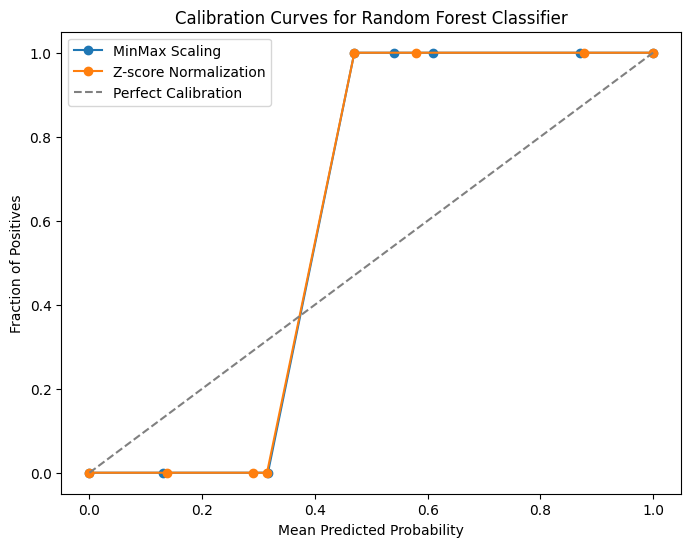

In [18]:
y_prob_minmax = rf_minmax.predict_proba(X_test_minmax)[:, 1]
y_prob_standard = rf_standard.predict_proba(X_test_standard)[:, 1]

fraction_of_positives_minmax, mean_predicted_value_minmax = calibration_curve(y_test, y_prob_minmax, n_bins=10)
fraction_of_positives_standard, mean_predicted_value_standard = calibration_curve(y_test, y_prob_standard, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value_minmax, fraction_of_positives_minmax, marker='o', linestyle='-', label='MinMax Scaling')
plt.plot(mean_predicted_value_standard, fraction_of_positives_standard, marker='o', linestyle='-', label='Z-score Normalization')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves for Random Forest Classifier')
plt.legend()
plt.show()

## 13. Confusion Matrix

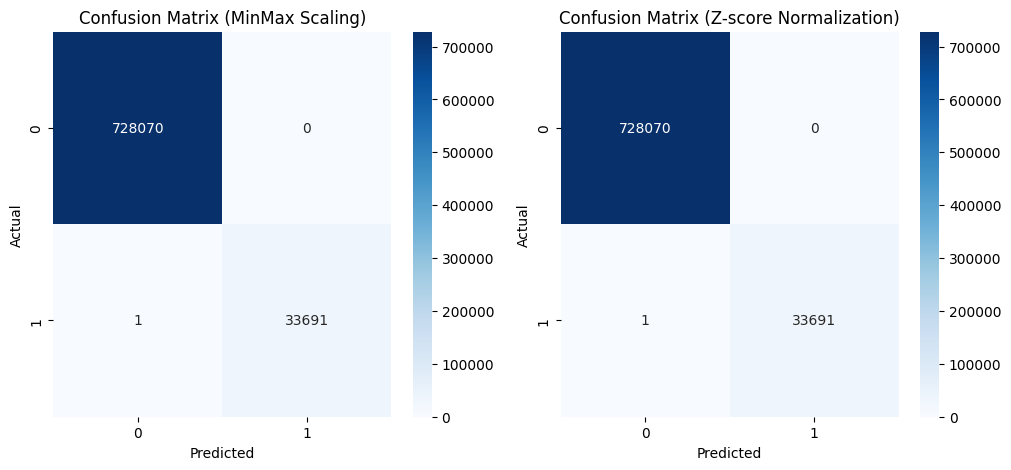

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MinMax Scaling
cm_minmax = confusion_matrix(y_test, y_pred_minmax)
sns.heatmap(cm_minmax, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (MinMax Scaling)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Z-score Normalization
cm_standard = confusion_matrix(y_test, y_pred_standard)
sns.heatmap(cm_standard, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix (Z-score Normalization)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

## 14. ROC Curve

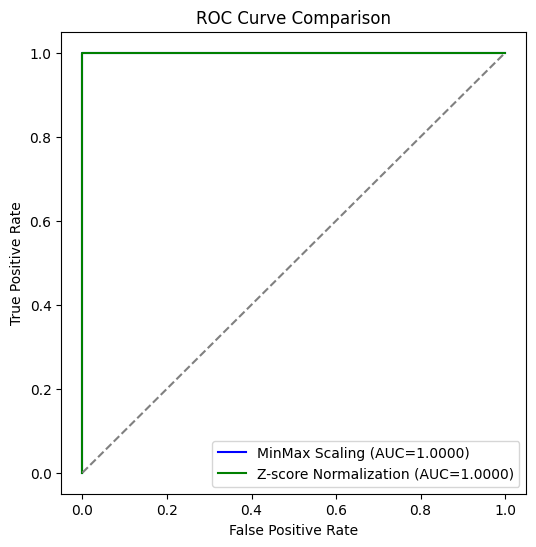

In [20]:
fig, ax = plt.subplots(figsize=(6,6))

# MinMax Scaling
y_prob_minmax = rf_minmax.predict_proba(X_test_minmax)[:, 1]
fpr_minmax, tpr_minmax, _ = roc_curve(y_test, y_prob_minmax)
roc_auc_minmax = auc(fpr_minmax, tpr_minmax)
ax.plot(fpr_minmax, tpr_minmax, label=f"MinMax Scaling (AUC={roc_auc_minmax:.4f})", color="blue")

# Z-score Normalization
y_prob_standard = rf_standard.predict_proba(X_test_standard)[:, 1]
fpr_standard, tpr_standard, _ = roc_curve(y_test, y_prob_standard)
roc_auc_standard = auc(fpr_standard, tpr_standard)
ax.plot(fpr_standard, tpr_standard, label=f"Z-score Normalization (AUC={roc_auc_standard:.4f})", color="green")

# Random Guess Line
ax.plot([0, 1], [0, 1], color="gray", linestyle="--")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve Comparison")
ax.legend(loc="lower right")
plt.show()


## 15. Precision Recall

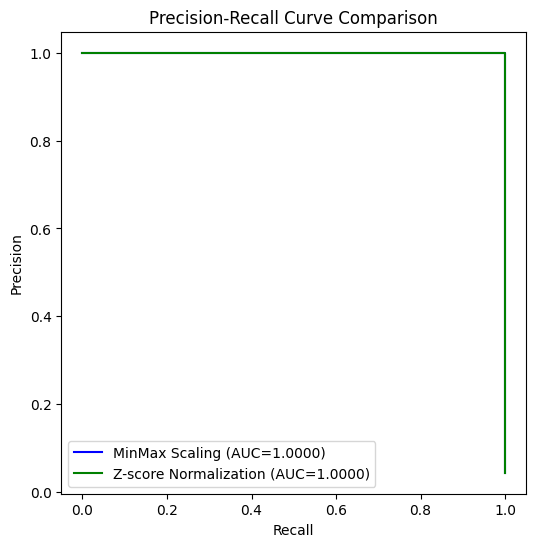

In [21]:
fig, ax = plt.subplots(figsize=(6,6))

# MinMax Scaling
precision_minmax, recall_minmax, _ = precision_recall_curve(y_test, y_prob_minmax)
pr_auc_minmax = auc(recall_minmax, precision_minmax)
ax.plot(recall_minmax, precision_minmax, label=f"MinMax Scaling (AUC={pr_auc_minmax:.4f})", color="blue")

# Z-score Normalization
precision_standard, recall_standard, _ = precision_recall_curve(y_test, y_prob_standard)
pr_auc_standard = auc(recall_standard, precision_standard)
ax.plot(recall_standard, precision_standard, label=f"Z-score Normalization (AUC={pr_auc_standard:.4f})", color="green")

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall Curve Comparison")
ax.legend(loc="lower left")
plt.show()


## 16. Residuals

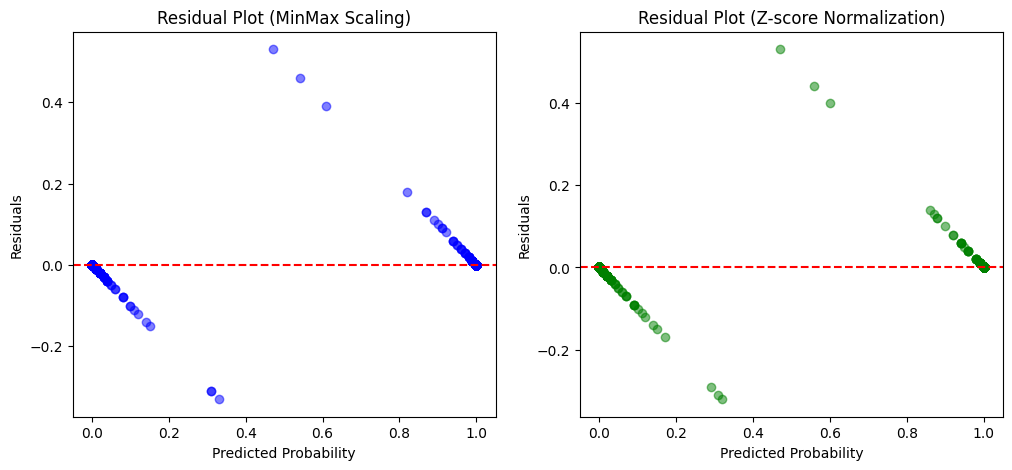

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MinMax Scaling
residuals_minmax = y_test - y_prob_minmax
axes[0].scatter(y_prob_minmax, residuals_minmax, alpha=0.5, color="blue")
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title("Residual Plot (MinMax Scaling)")
axes[0].set_xlabel("Predicted Probability")
axes[0].set_ylabel("Residuals")

# Z-score Normalization
residuals_standard = y_test - y_prob_standard
axes[1].scatter(y_prob_standard, residuals_standard, alpha=0.5, color="green")
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title("Residual Plot (Z-score Normalization)")
axes[1].set_xlabel("Predicted Probability")
axes[1].set_ylabel("Residuals")

plt.show()

## 17. Save Trained Models

In [23]:
joblib.dump(rf_minmax, "random_forest_minmax.pkl")
joblib.dump(rf_standard, "random_forest_standard.pkl")

['random_forest_standard.pkl']